# Exercise 22

In this exercise we will perform QDA with three classes. The exercise does not have any major insights worth to explore in a full pdf. Therefore, the exercise will be solved here in this notebook. At the end of the notebook there is a **interesting visualization** which intuitively explains the result of this exercise.

In [129]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = 10, 8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Declare the parameters of the distributions and the data points

In [130]:
mu_1 = np.array([0, 0])
mu_2 = np.array([1, 1])
mu_3 = np.array([-1, 1])

Sigma_1 = np.array([[0.7, 0], [0, 0.7]]) 
Sigma_2 = np.array([[0.8, 0.2], [0.2, 0.8]])
Sigma_3 = np.array([[0.8, 0.2], [0.2, 0.8]])

x_1 = np.array([-0.5, 0.5])
x_2 = np.array([0.5, 0.5])

x = np.asarray([mu_1[0], mu_2[0], mu_3[0], x_1[0], x_2[0]])
y = np.asarray([mu_1[1], mu_2[1], mu_3[1], x_1[1], x_2[1]])

## Initial visualization

Visualization of the two data points and the three mvn means

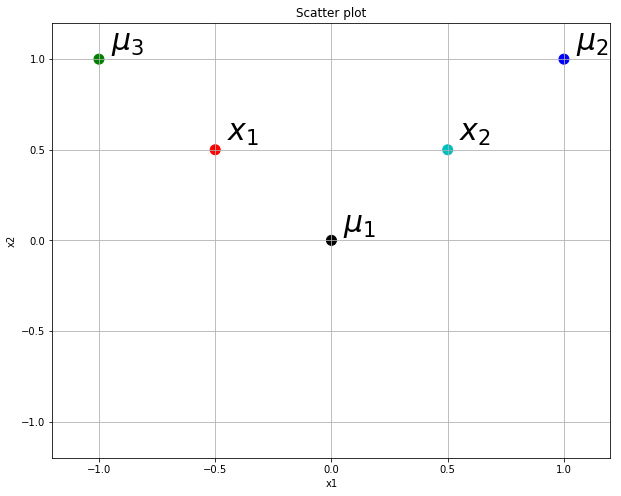

In [131]:
fig, ax = plt.subplots()
text = ['$\mu_1$', '$\mu_2$', '$\mu_3$', '$x_1$', '$x_2$']
text_loc_x = x + 0.05
text_loc_y = y + 0.05
ax.scatter(
    x, 
    y, 
    color=['k', 'b', 'g', 'r', 'c'],
    s=100)
for i, txt in enumerate(text):
    ax.annotate(txt, (text_loc_x[i], text_loc_y[i]), size=30)
ax.grid()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_title('Scatter plot')

## Remark

Note that the x_1 has **the same Euclidean distance** from the center of the first and third Gaussian. Also, x_2 has the **same Euclidean distance** from the center of the first and second Gaussian. 

## Classification

The classification of each point is based on which class produce the bigger posterior distribution. Since the prior of three classes are the same, the Gaussian class conditional is responsible to determine the bigger score.

In [119]:
score_x1 = [
    multivariate_normal.pdf(x_1, mu_1, Sigma_1),
    multivariate_normal.pdf(x_1, mu_2, Sigma_2),
    multivariate_normal.pdf(x_1, mu_3, Sigma_3)    
]
class_x1 = score_x1.index(max(score_x1)) + 1
print('Class x_1 = {}'.format(class_x1))

score_x2 = [
    multivariate_normal.pdf(x_2, mu_1, Sigma_1),
    multivariate_normal.pdf(x_2, mu_2, Sigma_2),
    multivariate_normal.pdf(x_2, mu_3, Sigma_3)    
]
class_x2 = score_x2.index(max(score_x2)) + 1
print('Class x_2 = {}'.format(class_x2))

Class x_1 = 1
Class x_2 = 2


## Visualization of the result

Let's draw the contour maps to see the classification results on the plot.

<a list of 1 text.Text objects>

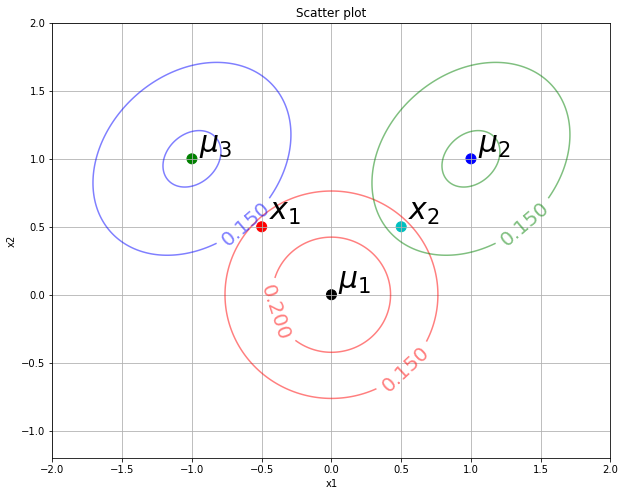

In [132]:
fig, ax = plt.subplots()

text = ['$\mu_1$', '$\mu_2$', '$\mu_3$', '$x_1$', '$x_2$']
text_loc_x = x + 0.05
text_loc_y = y + 0.05
ax.scatter(
    x, 
    y, 
    color=['k', 'b', 'g', 'r', 'c'],
    s=100)
for i, txt in enumerate(text):
    ax.annotate(txt, (text_loc_x[i], text_loc_y[i]), size=30)
ax.grid()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-1.2, 2.0])
ax.set_title('Scatter plot')

x_pos, y_pos = np.mgrid[-2.0:2.0:.01, -2.0:2.0:.01]
pos = np.empty(x_pos.shape + (2,))
pos[:, :, 0] = x_pos 
pos[:, :, 1] = y_pos
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
contour_levels= [0.15, 0.2]
cs1 = ax.contour(
    x_pos, y_pos, rv1.pdf(pos), colors='r', alpha=0.5, levels=contour_levels)
cs2 = ax.contour(
    x_pos, y_pos, rv2.pdf(pos), colors='g', alpha=0.5, levels=contour_levels)
cs3 = ax.contour(
    x_pos, y_pos, rv3.pdf(pos), colors='b',alpha=0.5, levels=contour_levels)
ax.clabel(cs1, fontsize=20)
ax.clabel(cs2, fontsize=20)
ax.clabel(cs3, fontsize=20)

# Final conclusion

In our classification cell, we discoreved that class_x_1 = 1 and class_x_2 = 2. The final visualization make it clear why that happened. The first Gaussian has an isotropic shape, while the second and third Gaussian have the same anisotropic shape. Anisotropic shapes deform the space making an ellipse which dilates the space in the major axis direction and contracts the space in the minor axis direction. x_1 is in the direction of the minor axis of the ellipse with center in mu_3 and x_2 is in the direction of the major axis of the ellipse with center of mu_2. Hence, x_1 is closer to mu_1 and x_2 is closer to mu_2